In [21]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


data_address = "../hw1/LSDA_data/mnist/MNIST_data.npy"
data_label = "../hw1/LSDA_data/mnist/MNIST_labels.npy"
data = np.float64(np.load(data_address)/255)
label = np.float32(np.load(data_label))

print(len(data))

def show_images(examples, nrows, ncols):
    plt.figure(figsize=(ncols*2, nrows*2))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(examples[i].reshape((28,28)), cmap='gray')
        plt.axis('off')
    plt.show()

70000


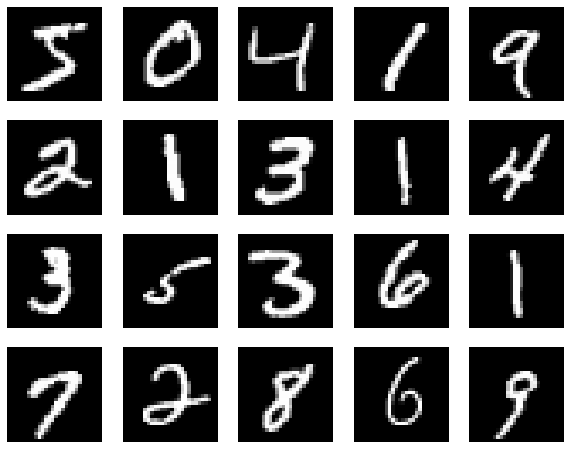

In [22]:
show_images(data, 4, 5 )

In [23]:
# perform PCA to extract principal components of the training data
# may not use PCA library

import sklearn
import scipy
from numpy import linalg as LA

# given a set of vectors of n dimension, compute the PCA of them.
# i.e., return the first top k eigenvectors of S

def PCA(X,k):
    # assume that the given vector are column vectors. If not, pass down column vectors 
    print("1st line")
    X_bar = np.mean(X, axis=0)
    print("2nd line")
    # print("X_bar s: ", X_bar)
    X_tilde = X - X_bar
    # print("X_tilde is: ", X_tilde)
    print("this step is finished1")
    print("shape of X: ", X.shape)
    S = np.cov(X_tilde.T)
    S2 = np.zeros(X.shape)
    n = len(X)
    for i in range(n):
        S2 = S2 + 1 / n * (X[i].T @ X[i])
    print("this step is finished2")
    # print("S: ", S)
    # compute the eigenvalues along with the eigenvectors
    # since S is symmetric we can use eigh instead of eig
    w,v = LA.eigh(S)
    print("w is: ", w)
    print("v is: ", v)
    # sort the pair of eigenvalues and eigenvectors
    # credti to https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt for sorting eigenvalues
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]
    # V = np.vstack([w[i] for i in range(k)])
    print("v is: ", v[:,:k])
    print("w is:", w[:k])
    print("size of w:", len(w))
    return v[:,:k], w[:k]


In [24]:
# display the top 10 principal components as images:
print("X is: ", data)

v,w = PCA(data, 10)
show_images(v.T, 2, 5)


V,W = PCA(data, 784)
plt.plot(W)
plt.title(label="Variances of all the principal components")
plt.show()
        


# plot the variance, or the singular values. 


X is:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1st line
2nd line
this step is finished1
shape of X:  (70000, 784)
